##Purpose102
##Linear models103
###Definition103
###Stationarity104
###Simulation104

ERROR: Error in replayPlot(obj): invalid graphics state


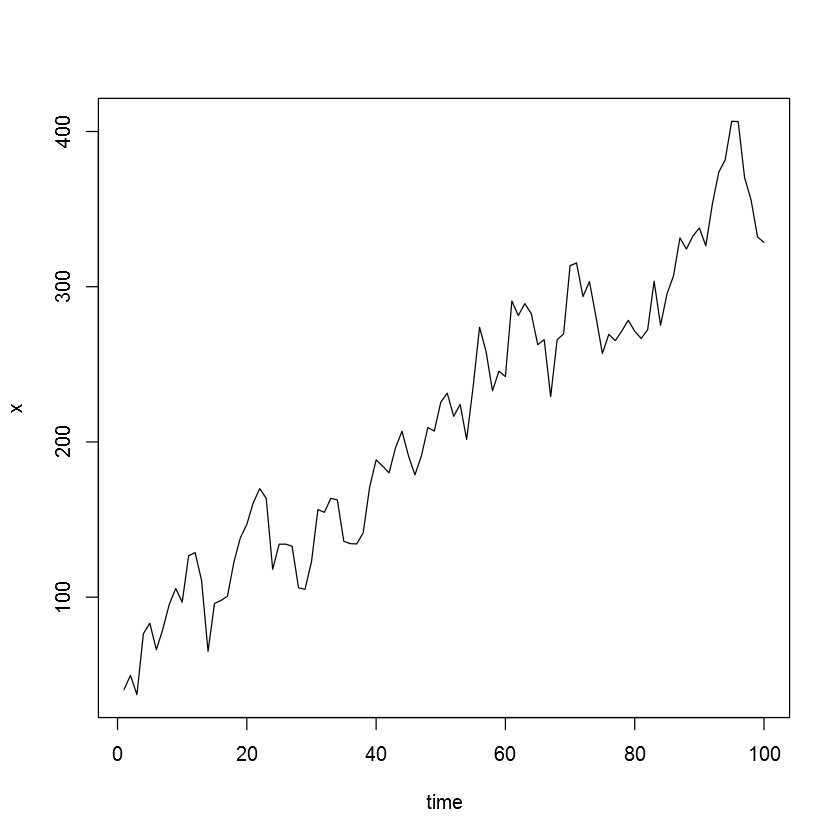

In [1]:
set.seed(1)
z <- w <- rnorm(100, sd = 20)
for (t in 2:100) z[t] <- 0.8 * z[t - 1] + w[t]
Time <- 1:100
x <- 50 + 3 * Time + z
plot(x, xlab = "time", type = "l")

##Fitted models105
###Model fitted to simulated data105

In [2]:
x.lm <- lm(x ~ Time)
coef(x.lm)
sqrt(diag(vcov(x.lm)))

(Intercept)        Time 
  58.551218    3.063275

(Intercept)        Time 
 4.88006278  0.08389621

###Model fitted to the temperature series (1970--2005)106

(Intercept)  time(temp) 
 -34.920409    0.017654

,2.5 %,97.5 %
(Intercept),-37.21001,-32.63081
time(temp),0.01650228,0.01880572


ERROR: Error in replayPlot(obj): invalid graphics state


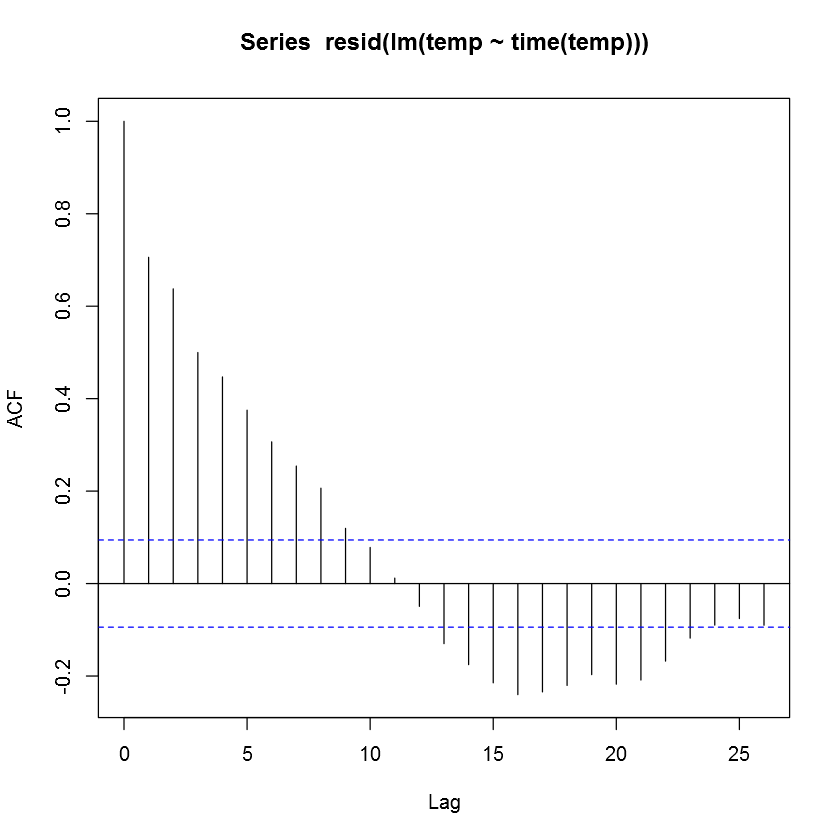

In [10]:
# www <- "http://www.massey.ac.nz/~pscowper/ts/global.dat"
Global <- scan('global.dat')
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005,12),fr = 12)
temp <- window(Global.ts, start = 1970)
temp.lm <- lm(temp ~ time(temp))
coef(temp.lm)
confint(temp.lm)
acf(resid(lm(temp ~ time(temp))))

###Autocorrelation and the estimation of sample statistics*107
##Generalised least squares109
###GLS fit to simulated series109

In [11]:
library(nlme)
x.gls <- gls(x ~ Time, cor = corAR1(0.8))
coef(x.gls)
sqrt(diag(vcov(x.gls)))

(Intercept)        Time 
  58.233018    3.042245

(Intercept)        Time 
 11.9245679   0.2024447

###Confidence interval for the trend in the temperature series110

In [12]:
temp.gls <- gls(temp ~ time(temp), cor = corAR1(0.7))
confint(temp.gls)

,2.5 %,97.5 %
(Intercept),-39.80572,-28.49659
time(temp),0.01442274,0.02011148


##Linear models with seasonal variables110
###Introduction110
###Additive seasonal indicator variables110
###Example: Seasonal model for the temperature series111

In [14]:
Seas <- cycle(temp)
Time <- time(temp)
temp.lm <- lm(temp ~ 0 + Time + factor(Seas))
coef(temp.lm)

Time  factor(Seas)1  factor(Seas)2  factor(Seas)3  factor(Seas)4 
    0.01770758   -34.99726483   -34.98801824   -35.01002165   -35.01227506 
 factor(Seas)5  factor(Seas)6  factor(Seas)7  factor(Seas)8  factor(Seas)9 
  -35.03369513   -35.02505965   -35.02689640   -35.02476092   -35.03831988 
factor(Seas)10 factor(Seas)11 factor(Seas)12 
  -35.05248996   -35.06557670   -35.04871900

In [15]:
new.t <- seq(2006, len = 2 * 12, by = 1/12)
alpha <- coef(temp.lm)[1]
beta <- rep(coef(temp.lm)[2:13], 2)
(alpha * new.t + beta)[1:4]

factor(Seas)1 factor(Seas)2 factor(Seas)3 factor(Seas)4 
    0.5241458     0.5348681     0.5143403     0.5135625

In [16]:
new.dat <- data.frame(Time = new.t, Seas = rep(1:12, 2))
predict(temp.lm, new.dat)[1:24]

1         2         3         4         5         6         7         8 
0.5241458 0.5348681 0.5143403 0.5135625 0.4936181 0.5037292 0.5033681 0.5069792 
        9        10        11        12        13        14        15        16 
0.4948958 0.4822014 0.4705903 0.4889236 0.5418534 0.5525756 0.5320479 0.5312701 
       17        18        19        20        21        22        23        24 
0.5113256 0.5214367 0.5210756 0.5246867 0.5126034 0.4999090 0.4882979 0.5066312

##Harmonic seasonal models112

ERROR: Error in replayPlot(obj): invalid graphics state


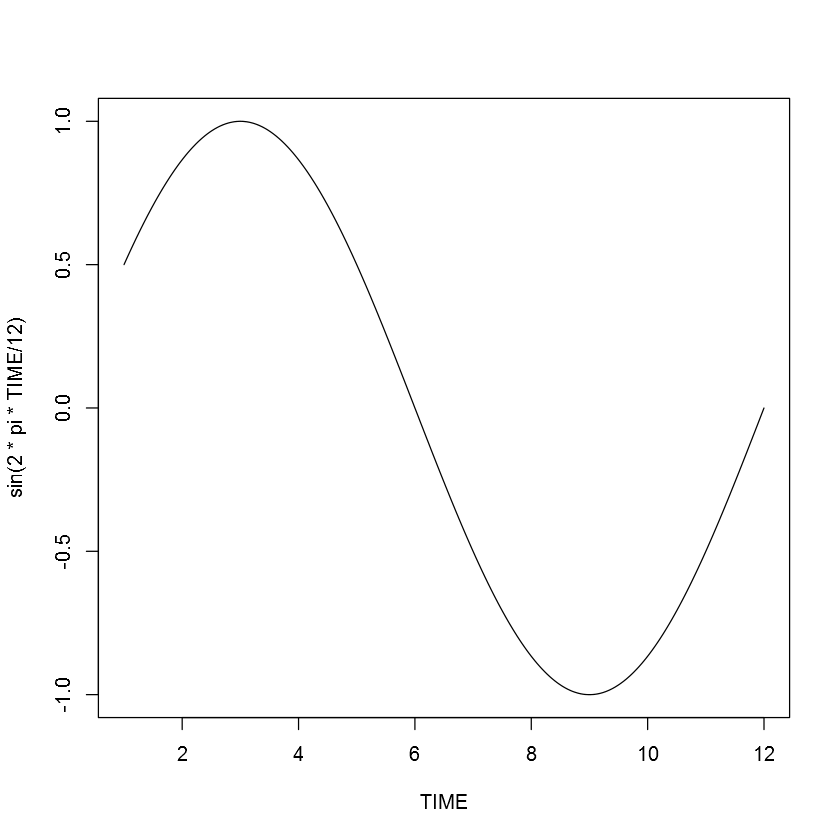

ERROR: Error in replayPlot(obj): invalid graphics state


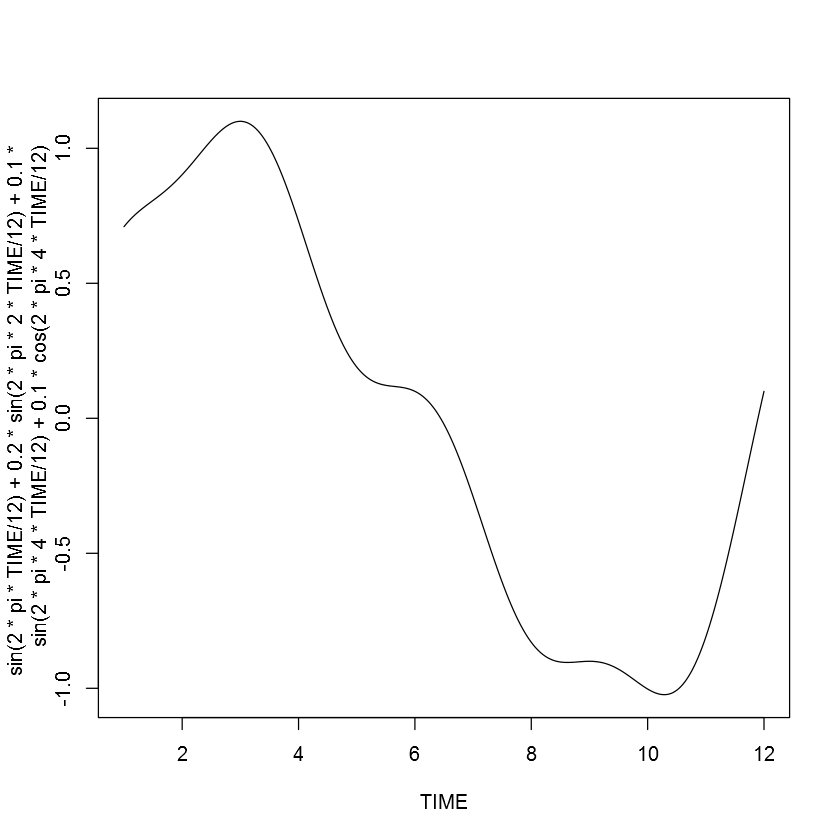

In [17]:
TIME <- seq(1, 12, len = 1000)
plot(TIME, sin(2 * pi * TIME/12), type = "l")
plot(TIME, sin(2 * pi * TIME/12) + 0.2 * sin(2 * pi * 2 *
    TIME/12) + 0.1 * sin(2 * pi * 4 * TIME/12) + 0.1 *
    cos(2 * pi * 4 * TIME/12), type = "l")

###Simulation113

ERROR: Error in replayPlot(obj): invalid graphics state


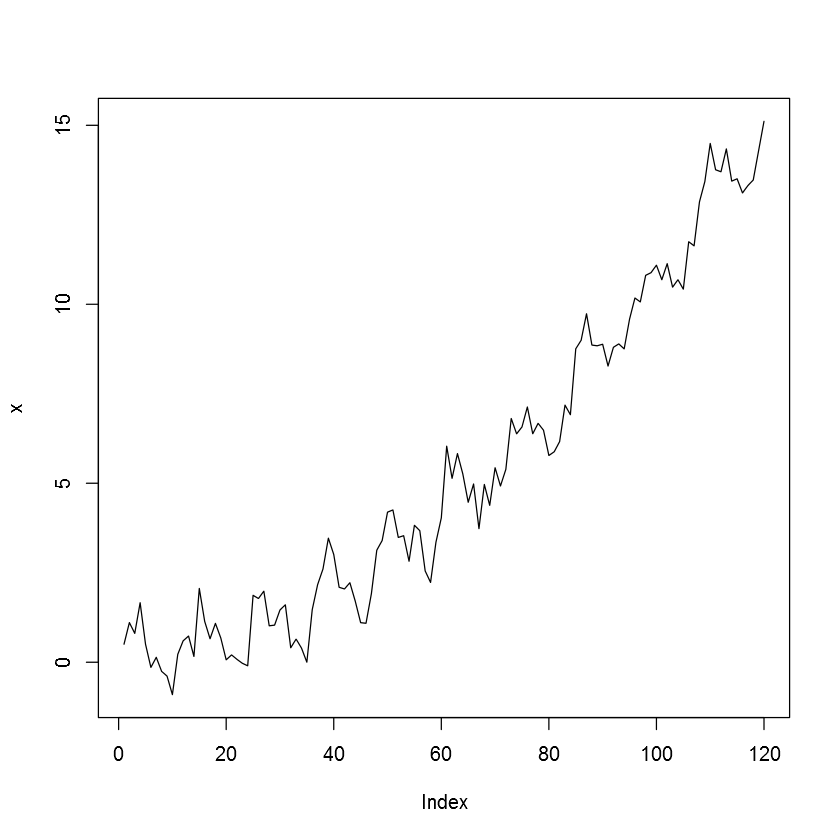

In [19]:
set.seed(1)
TIME <- 1:(10 * 12)
w <- rnorm(10 * 12, sd = 0.5)
Trend <- 0.1 + 0.005 * TIME + 0.001 * TIME^2
Seasonal <- sin(2*pi*TIME/12) + 0.2*sin(2*pi*2*TIME/12) +
    0.1*sin(2*pi*4*TIME/12) + 0.1*cos(2*pi*4*TIME/12)
x <- Trend + Seasonal + w
plot(x, type = "l")

###Fit to simulated series114

###Harmonic model fitted to temperature series (1970--2005)116
##Logarithmic transformations120
###Introduction120
###Example using the air passenger series120
##Non-linear models124
###Introduction124
###Example of a simulated and fitted non-linear series124
##Forecasting from regression126
###Introduction126
###Prediction in R126
##Inverse transform and bias correction126
###Log-normal residual errors126
###Empirical correction factor for forecasting means128
###Example using the air passenger data128
##Summary of R commands129
##Exercises129